### Data preprocessing without MPI

In [7]:
'''
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data
#specify the scaling type
scaler =MinMaxScaler()
#get the start time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/../results/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)

#load the data
data =pd.read_csv("../data/tndata.csv")

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi_cpu.png')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Unscaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi_2_cpu.png')
        plt.show()    
    return tt, II, RR
'''
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler   #for scaling data
#specify the scaling type
scaler =MinMaxScaler()
#get the start time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/../results/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)

#load the data
data =pd.read_csv("../data/tndata.csv")

%matplotlib inline
#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi.png')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Unscaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.savefig(out + 'scaled_wompi_2.png')
        plt.show()    
    return tt, II, RR



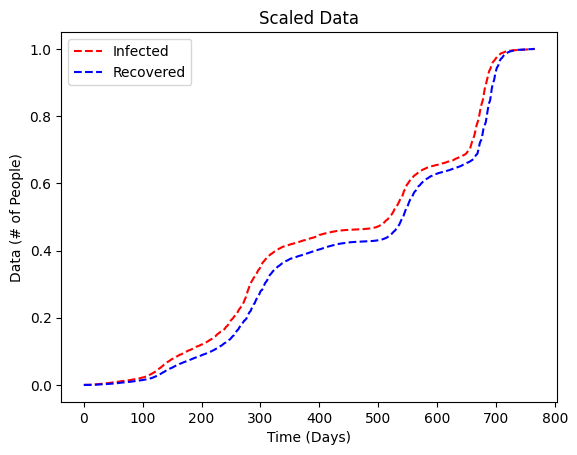

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.4939559519999994


In [8]:
start =process_time()
tt, II, RR=data_process(data, scaler, "yes")  #scaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

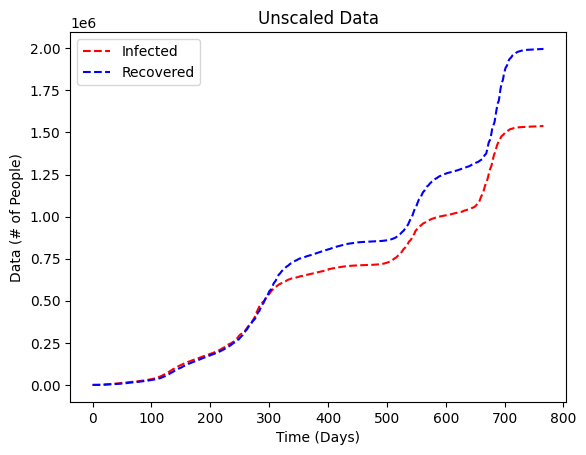

++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 0.5267604200000005


In [9]:
start =process_time()
tt, II, RR=data_process(data, scaler, "no")  #unscaled

stop = process_time()
print("++++++++++++++++++Data Processing without MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

### Data preprocessing with MPI

In [15]:
%%file script.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    def data_process(data, scaler, cs ="yes"):
        #reverse index
        tdata=data.reindex(index=data.index[::-1])
        #get the infected 
        I=tdata['TOTAL_CONFIRMED']
        #get the recovered
        R =tdata['TOTAL_INACTIVE_RECOVERED']
        #get the length of the data
        nn =len(I)
        # show whether want to scaling
        if cs =="yes": ##indicate yes
            tt=np.linspace(0,nn, nn)
            y1 =np.array(I[:nn]).reshape((-1,1))
            y2 =np.array(R[:nn]).reshape((-1,1))
            #scaling
            II =scaler.fit_transform(y1)
            RR =scaler.fit_transform(y2)
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Scaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_mpi_cpu.png')
            plt.show()
        else:  ##indicate no
            tt=np.linspace(0,nn, nn)
            II =np.array(I[:nn]).reshape((-1,1))
            RR =np.array(R[:nn]).reshape((-1,1))
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Unscaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig(out + 'scaled_mpi_2_cpu.png')
            plt.show()    
        return tt, II, RR  #scaled
    print("rank0 finished")
    data =pd.read_csv("tndata.csv")
    scaler =MinMaxScaler()
    tt, II, RR=data_process(data, scaler, "yes")  #scaled
    
    
#get the start time



Overwriting script.py


In [16]:
start =process_time()

!mpiexec  -np 4 python script.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 

In [17]:
%%file script1.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    #start = process_time()
    def data_process(data, scaler, cs ="yes"):
        #reverse index
        tdata=data.reindex(index=data.index[::-1])
        #get the infected 
        I=tdata['TOTAL_CONFIRMED']
        #get the recovered
        R =tdata['TOTAL_INACTIVE_RECOVERED']
        #get the length of the data
        nn =len(I)
        # show whether want to scaling
        if cs =="yes": ##indicate yes
            tt=np.linspace(0,nn, nn)
            y1 =np.array(I[:nn]).reshape((-1,1))
            y2 =np.array(R[:nn]).reshape((-1,1))
            #scaling
            II =scaler.fit_transform(y1)
            RR =scaler.fit_transform(y2)
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Scaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig('scaled_mpi_cpu.png')
            plt.show()
        else:  ##indicate no
            tt=np.linspace(0,nn, nn)
            II =np.array(I[:nn]).reshape((-1,1))
            RR =np.array(R[:nn]).reshape((-1,1))
            #plot
            plt.plot(tt, II, '--r')
            plt.plot(tt, RR, '--b')
            plt.legend(['Infected', 'Recovered'])
            plt.title('Unscaled Data') 
            plt.xlabel('Time (Days)')
            plt.ylabel('Data (# of People)')
            plt.savefig('scaled_mpi_2_cpu.png')
            plt.show()    
        return tt, II, RR  #scaled
    print("rank0 finished")
    data =pd.read_csv("tndata.csv")
    scaler =MinMaxScaler()
    tt, II, RR=data_process(data, scaler, "no")  #scaled
    
    
#get the start time



Overwriting script1.py


In [18]:
start =process_time()

!mpiexec  -np 4 python script1.py

stop = process_time()

print("++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++\n")
print("CPU time for data preprocessing in seconds:",stop-start) 

--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Data Processing with MPI+++++++++++++++++++++++

CPU time for data preprocessing in seconds: 

### Modeling without mpi on CPU

In [19]:
from rnn_models_cpu import *
import torch
tt, II, RR =data_process(data,scaler, 'no')
#RNN models
start =process_time()
i_true_l, i_pred_l, _, _, _, _,_, i_loss_l=run_model_cpu(II, 'LSTM', 1500, 128, 500, 0.8) 
i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cpu(II, 'BiLSTM', 1500, 128, 500, 0.8)
i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cpu(II, 'GRU', 1500, 100, 500, 0.8)

x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))

plt.plot(x_t, i_true_l, '-o')
plt.plot(x_t, i_pred_l, '--b')
plt.plot(x_t, i_pred_b, '--r')
plt.plot(x_t, i_pred_g, '--c')
plt.legend(['LSTM', 'BiLSTM', 'GRU'])
plt.title('Modeling without mpi on CPU')
plt.xlabel('Time (Days)')
plt.ylabel('Infected Data')
plt.savefig(out+'wompi_cpu.png')
plt.show()

stop = process_time()

print("++++++++++++++++++Modeling Infected Data without MPI on CPU+++++++++++++++++++++++\n")
print("Time for modeling without MPI on CPU in seconds:",stop-start) 

Tennessee outcomes on CPU............
LSTM Training
Epoch 100/1500, Total Loss: 3.137e-03, Time:0.15 seconds
Epoch 200/1500, Total Loss: 3.552e-04, Time:0.19 seconds
Epoch 300/1500, Total Loss: 2.511e-04, Time:0.21 seconds
Epoch 400/1500, Total Loss: 1.964e-04, Time:0.21 seconds
Epoch 500/1500, Total Loss: 1.165e-04, Time:0.21 seconds
Epoch 600/1500, Total Loss: 1.012e-04, Time:0.22 seconds
Epoch 700/1500, Total Loss: 1.685e-04, Time:0.21 seconds
Epoch 800/1500, Total Loss: 9.668e-05, Time:0.21 seconds
Epoch 900/1500, Total Loss: 6.711e-05, Time:0.21 seconds
Epoch 1000/1500, Total Loss: 5.258e-05, Time:0.20 seconds
Epoch 1100/1500, Total Loss: 8.716e-05, Time:0.18 seconds
Epoch 1200/1500, Total Loss: 7.024e-05, Time:0.17 seconds
Epoch 1300/1500, Total Loss: 4.362e-05, Time:0.16 seconds
Epoch 1400/1500, Total Loss: 3.842e-05, Time:0.16 seconds
Epoch 1500/1500, Total Loss: 5.760e-05, Time:0.15 seconds
LSTM Total Training Time in seconds 297.4324781894684
Evaluation Time: 0.09697961807250

### Modeling with MPI on CPU

## When $p=1$

In [2]:
%%file script2.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/../results/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
from rnn_models_cpu import *
#load the data
data =pd.read_csv("tndata.csv")
# tt, II, RR =data_process(data,scaler, 'no')
scaler =MinMaxScaler()

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.show()    
    return tt, II, RR
p=1

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    tt, II, RR =data_process(data,scaler, 'no')
    i_true_l, i_pred_l, _, _, _, _,ep, i_loss_l=run_model_cpu(II, 'LSTM', 1500, 128, 500, 0.8) 
    i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cpu(II, 'BiLSTM', 1500, 128, 500, 0.8)
    i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cpu(II, 'GRU', 1500, 100, 500, 0.8)
    x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))
    
    
    plt.plot(x_t, i_true_l, '-o')
    plt.plot(x_t, i_pred_l, '--b')
    plt.plot(x_t, i_pred_b, '--r')
    plt.plot(x_t, i_pred_g, '--c')
    plt.legend(['LSTM', 'BiLSTM', 'GRU'])
    plt.title('Modeling with MPI on CPU')
    plt.savefig(out+'wmpi_cpu_{}.png'.format(p))
    plt.show()
    print("rank0 finished")


Overwriting script2.py


In [3]:
start =process_time()

!mpiexec  -np 1 python script2.py

stop = process_time()

print("++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CPU in seconds:",stop-start) 


--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++

Tme for modeling of Infected Data on CPU in 

## when $p=2$

In [22]:
%%file script2a.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
from rnn_models_cpu import *
#load the data
data =pd.read_csv("tndata.csv")
# tt, II, RR =data_process(data,scaler, 'no')
scaler =MinMaxScaler()

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.show()    
    return tt, II, RR
p=2

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    tt, II, RR =data_process(data,scaler, 'no')
    i_true_l, i_pred_l, _, _, _, _,ep, i_loss_l=run_model_cpu(II, 'LSTM', 1500, 128, 500, 0.8) 
    i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cpu(II, 'BiLSTM', 1500, 128, 500, 0.8)
    i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cpu(II, 'GRU', 1500, 100, 500, 0.8)
    x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))
    
    
    plt.plot(x_t, i_true_l, '-o')
    plt.plot(x_t, i_pred_l, '--b')
    plt.plot(x_t, i_pred_b, '--r')
    plt.plot(x_t, i_pred_g, '--c')
    plt.legend(['LSTM', 'BiLSTM', 'GRU'])
    plt.title('Modeling with MPI on CPU')
    plt.savefig(out+'wmpi_cpu_{}.png'.format(p))
    plt.show()
    print("rank0 finished")
    

Overwriting script2a.py


In [23]:
start =process_time()

!mpiexec  -np 2 python script2a.py

stop = process_time()

print("++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CPU in seconds:",stop-start) 


--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++

Tme for modeling of Infected Data on CPU in 

## when $p=4$

In [24]:
%%file script2b.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
from rnn_models_cpu import *
#load the data
data =pd.read_csv("tndata.csv")
# tt, II, RR =data_process(data,scaler, 'no')
scaler =MinMaxScaler()

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('UnScaled Data') 
        plt.show()    
    return tt, II, RR
p=4

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    tt, II, RR =data_process(data,scaler, 'no')
    i_true_l, i_pred_l, _, _, _, _,ep, i_loss_l=run_model_cpu(II, 'LSTM', 1500, 128, 500, 0.8) 
    i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cpu(II, 'BiLSTM', 1500, 128, 500, 0.8)
    i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cpu(II, 'GRU', 1500, 100, 500, 0.8)
    x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))
    
    
    plt.plot(x_t, i_true_l, '-o')
    plt.plot(x_t, i_pred_l, '--b')
    plt.plot(x_t, i_pred_b, '--r')
    plt.plot(x_t, i_pred_g, '--c')
    plt.legend(['LSTM', 'BiLSTM', 'GRU'])
    plt.title('Modeling with MPI on CPU')
    plt.savefig(out+'wmpi_cpu_{}.png'.format(p))
    plt.show()
    print("rank0 finished")
    

Overwriting script2b.py


In [25]:
start =process_time()

!mpiexec  -np 4 python script2b.py

stop = process_time()

print("++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CPU in seconds:",stop-start) 

--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++

Tme for modeling of Infected Data on CPU in 

## when $p=8$

In [26]:
%%file script2c.py
#!/usr/bin/env python
from mpi4py import MPI
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time    #checking cpu time
from sklearn.preprocessing import MinMaxScaler 
import time
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
c_dir =os.getcwd()
path = '/Figures/'   #for sir models
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out)
from rnn_models_cpu import *
#load the data
data =pd.read_csv("tndata.csv")
# tt, II, RR =data_process(data,scaler, 'no')
scaler =MinMaxScaler()

#define the preprocess function
def data_process(data, scaler, cs ="yes"):
    #reverse index
    tdata=data.reindex(index=data.index[::-1])
    #get the infected 
    I=tdata['TOTAL_CONFIRMED']
    #get the recovered
    R =tdata['TOTAL_INACTIVE_RECOVERED']
    #get the length of the data
    nn =len(I)
    # show whether want to scaling
    if cs =="yes": ##indicate yes
        tt=np.linspace(0,nn, nn)
        y1 =np.array(I[:nn]).reshape((-1,1))
        y2 =np.array(R[:nn]).reshape((-1,1))
        #scaling
        II =scaler.fit_transform(y1)
        RR =scaler.fit_transform(y2)
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Scaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.show()
    else:  ##indicate no
        tt=np.linspace(0,nn, nn)
        II =np.array(I[:nn]).reshape((-1,1))
        RR =np.array(R[:nn]).reshape((-1,1))
        #plot
        plt.plot(tt, II, '--r')
        plt.plot(tt, RR, '--b')
        plt.legend(['Infected', 'Recovered'])
        plt.title('Unscaled Data') 
        plt.xlabel('Time (Days)')
        plt.ylabel('Data (# of People)')
        plt.show()    
    return tt, II, RR
p=8

comm = MPI.COMM_WORLD
rank = comm.rank
size = comm.size
name = MPI.Get_processor_name()
if rank == 0:
    tt, II, RR =data_process(data,scaler, 'no')
    i_true_l, i_pred_l, _, _, _, _,ep, i_loss_l=run_model_cpu(II, 'LSTM', 1500, 128, 500, 0.8) 
    i_true_b, i_pred_b, _, _, _, _,_, i_loss_b=run_model_cpu(II, 'BiLSTM', 1500, 128, 500, 0.8)
    i_true_g, i_pred_g, _, _, _, _,_, i_loss_g=run_model_cpu(II, 'GRU', 1500, 100, 500, 0.8)
    x_t =np.arange(0, len(i_pred_l),1).reshape((-1,1))
    
    
    plt.plot(x_t, i_true_l, '-o')
    plt.plot(x_t, i_pred_l, '--b')
    plt.plot(x_t, i_pred_b, '--r')
    plt.plot(x_t, i_pred_g, '--c')
    plt.legend(['LSTM', 'BiLSTM', 'GRU'])
    plt.title('Modeling with MPI on CPU')
    plt.xlabel('Time (Days)')
    plt.ylabel('Infected Data')
    plt.savefig(out+'wmpi_cpu_{}.png'.format(p))
    plt.show()
    print("rank0 finished")

Overwriting script2c.py


In [27]:
start =process_time()

!mpiexec  -np 8 python script2c.py

stop = process_time()

print("++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++\n")
print("Tme for modeling of Infected Data on CPU in seconds:",stop-start) 

--------------------------------------------------------------------------
mpiexec has detected an attempt to run as root.

Running as root is *strongly* discouraged as any mistake (e.g., in
defining TMPDIR) or bug can result in catastrophic damage to the OS
file system, leaving your system in an unusable state.

We strongly suggest that you run mpiexec as a non-root user.

You can override this protection by adding the --allow-run-as-root option
to the cmd line or by setting two environment variables in the following way:
the variable OMPI_ALLOW_RUN_AS_ROOT=1 to indicate the desire to override this
protection, and OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 to confirm the choice and
add one more layer of certainty that you want to do so.
We reiterate our advice against doing so - please proceed at your own risk.
--------------------------------------------------------------------------
++++++++++++++++++Modeling with MPI on CPU+++++++++++++++++++++++

Tme for modeling of Infected Data on CPU in 